In [1]:
import pandas as pd
import numpy as np 
import plotly.graph_objs as go
import seaborn as sns 
import matplotlib.pyplot as plt
import squarify 

In [2]:
data_import = pd.read_csv("2018-2010_import.csv")
data_export = pd.read_csv("2018-2010_export.csv")
data_import.head()

HSCode                                          Commodity   value  \
0       5  PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...    0.00   
1       7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.   12.38   
2       8  EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...  268.60   
3       9                      COFFEE, TEA, MATE AND SPICES.   35.48   
4      11  PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...     NaN   

           country  year  
0  AFGHANISTAN TIS  2018  
1  AFGHANISTAN TIS  2018  
2  AFGHANISTAN TIS  2018  
3  AFGHANISTAN TIS  2018  
4  AFGHANISTAN TIS  2018

In [3]:
data_import.describe()

HSCode         value          year
count  93095.000000  79068.000000  93095.000000
mean      53.849573     63.289855   2014.654740
std       27.567486    666.652363      2.702373
min        1.000000      0.000000   2010.000000
25%       30.000000      0.030000   2012.000000
50%       54.000000      0.380000   2015.000000
75%       78.000000      4.910000   2017.000000
max       99.000000  32781.570000   2018.000000

In [4]:
## HSCode is in between 1 to 99 meaning that there are 99 different types of import goods 
## Value shows a huge outlier as 75% data is below 4.9 and the max is 32781 showing that some goods are really expensive
## The dataset is recorded in between 2010 and 2018

In [5]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [6]:
data_export.describe()

HSCode          value           year
count  137023.000000  122985.000000  137023.000000
mean       51.330302      21.567829    2014.056304
std        28.018026     229.701279       2.580160
min         1.000000       0.000000    2010.000000
25%        28.000000       0.030000    2012.000000
50%        52.000000       0.360000    2014.000000
75%        74.000000       3.770000    2016.000000
max        99.000000   19805.170000    2018.000000

In [7]:
## HSCode is in between 1 to 99 meaning that there are 99 different types of import goods 
## Value shows a huge outlier as 75% data is below 3.7 and the max is 19805 showing that some goods are really expensive
## The dataset is recorded in between 2010 and 2018

In [8]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [9]:
data_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [10]:
## Import data has 93095 rows and export data has 137023 rows
## Both Import and export data contain null value in value column, therefore, needed to do some data cleanup 

In [11]:
##Data Cleanup

In [12]:
data_import.isnull().sum()

HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

In [13]:
data_import[data_import.value == 0].head()

HSCode                                          Commodity  value  \
0        5  PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...    0.0   
9       27  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...    0.0   
11      41  RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...    0.0   
20      81      OTHER BASE METALS; CERMETS; ARTICLES THEREOF.    0.0   
22      84  NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...    0.0   

            country  year  
0   AFGHANISTAN TIS  2018  
9   AFGHANISTAN TIS  2018  
11  AFGHANISTAN TIS  2018  
20  AFGHANISTAN TIS  2018  
22  AFGHANISTAN TIS  2018

In [14]:
data_import[data_import.country == "UNSPECIFIED"].head()

HSCode                                          Commodity  value  \
8263       1                                      LIVE ANIMALS.    NaN   
8264       2                        MEAT AND EDIBLE MEAT OFFAL.    NaN   
8265       3  FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...    3.1   
8266       4  DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...    0.1   
8267       5  PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...    NaN   

          country  year  
8263  UNSPECIFIED  2018  
8264  UNSPECIFIED  2018  
8265  UNSPECIFIED  2018  
8266  UNSPECIFIED  2018  
8267  UNSPECIFIED  2018

In [15]:
## By doing the steps above, we can confirm that therer are Null values in the value column 
## Record of trade with unspecified country might not be useful for this analysis, therefore, we'd remove it from dataset

In [16]:
def cleanup(data_df):
    #setting country UNSPECIFIED to nan
    data_df['country']= data_df['country'].apply(lambda x : np.NaN if x == "UNSPECIFIED" else x)
    #ignoring where import value is 0 . 
    data_df = data_df[data_df.value!=0]
    data_df.dropna(inplace=True)
    data_import.year = pd.Categorical(data_import.year)
    return data_df

In [17]:
clean_data_import = cleanup(data_import)
clean_data_export = cleanup(data_export)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
clean_data_import.isnull().sum()

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

In [19]:
clean_data_export.isnull().sum()

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

In [20]:
## As the Null values are being dropped as well as the rows contain unspecified country are removed, now we can look into the dataset

In [21]:
print("Import Commodity: " + str(len(clean_data_import['Commodity'].unique())))
print("Export Commodity: " + str(len(clean_data_export['Commodity'].unique())))

Import Commodity: 98
Export Commodity: 98


In [22]:
import_commodity = pd.DataFrame(clean_data_import['Commodity'].value_counts())
import_commodity.head(15)

Commodity
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...       1718
IRON AND STEEL                                           1651
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...       1635
ALUMINIUM AND ARTICLES THEREOF.                          1521
PLASTIC AND ARTICLES THEREOF.                            1395
COPPER AND ARTICLES THEREOF.                             1311
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING...       1264
RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND L...       1215
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.                1210
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE...       1119
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC...       1115
ORGANIC CHEMICALS                                        1087
ARTICLES OF IRON OR STEEL                                1085
PULP OF WOOD OR OF OTHER FIBROUS CELLULOSIC MAT...       1045
LEAD AND ARTICLES THEREOF.                               1044

In [23]:
import_commodity.describe()

Commodity
count    98.000000
mean    691.826531
std     353.147790
min     123.000000
25%     411.250000
50%     670.000000
75%     867.250000
max    1718.000000

In [24]:
export_commodity = pd.DataFrame(data_export['Commodity'].value_counts())
export_commodity.head(15)

Commodity
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...       1963
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...       1945
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING...       1917
PHARMACEUTICAL PRODUCTS                                  1916
ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, N...       1907
ARTICLES OF IRON OR STEEL                                1880
PLASTIC AND ARTICLES THEREOF.                            1872
VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING ...       1866
OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOT...       1865
MISCELLANEOUS GOODS.                                     1856
PAPER AND PAPERBOARD; ARTICLES OF PAPER PULP, O...       1842
ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, K...       1841
ARTICLES OF LEATHER,SADDLERY AND HARNESS;TRAVEL...       1840
PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER ...       1822
FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPOR...       1816

In [25]:
export_commodity.describe()

Commodity
count    98.000000
mean   1398.193878
std     401.076995
min     417.000000
25%    1098.500000
50%    1499.000000
75%    1714.500000
max    1963.000000

In [26]:
print("Import goods are associated with " + str(len(clean_data_import['country'].unique())) + " countries")
print("Export goods are associated with " + str(len(clean_data_export['country'].unique())) + " countries")

Import goods are associated with 240 countries
Export goods are associated with 246 countries


In [27]:
import_value_year = clean_data_import.groupby('year').agg({'value':'sum'})
export_value_year = clean_data_export.groupby('year').agg({'value':'sum'})


In [28]:
import_value_year['deficit'] = export_value_year.value - import_value_year.value 

In [29]:
import_value_year

value    deficit
year                       
2010   365444.94 -130033.93
2011   488272.63 -198761.05
2012   488805.22 -193858.35
2013   446095.99 -143251.86
2014   440463.87 -134304.07
2015   403827.96 -144036.54
2016   377006.72 -103641.56
2017   912759.18 -611681.00
2018  1027963.24 -700811.81

In [30]:

trace1 = go.Bar(
                x = import_value_year.index,
                y = import_value_year.value,
                name = "Import",
                marker = dict(color = 'rgba(0,191,255, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = import_value_year.value)
# create trace2 
trace2 = go.Bar(
                x = export_value_year.index,
                y = export_value_year.value,
                name = "Export",
                marker = dict(color = 'rgba(1, 255, 130, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = export_value_year.value)

trace3 = go.Bar(
                x = import_value_year.index,
                y = import_value_year.deficit,
                name = "Deficit",
                marker = dict(color = 'rgba(220, 20, 60, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = import_value_year.deficit)


data = [trace1, trace2, trace3]
layout = go.Layout(barmode = "group", title = "Total Value of Import, Export, and Deficit",
                  xaxis = dict(
                  title = "Year"),
                  yaxis = dict(
                  title = "Total Value (in million $)"))
fig = go.Figure(data = data, layout = layout)
fig.show()

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=import_value_year.index, y=import_value_year.value, name='Import Goods',mode='lines+markers',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=export_value_year.index, y=export_value_year.value, name = 'Export Goods',mode='lines+markers',
                         line=dict(color='royalblue', width=4)))
fig.update_layout(
    title=go.layout.Title(
        text="2010 - 2018 India Trade Value (in million dolloar $)",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Year",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Total Value ($)",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)

fig.show()

In [32]:
import_value_year[import_value_year.index < 2017].mean()

value      429988.190000
deficit   -149698.194286
dtype: float64

In [33]:
export_value_year[import_value_year.index < 2017].mean()

value    280289.995714
dtype: float64

In [34]:
import_value_year.value.max()

1027963.2400000317

In [35]:
import_value_year[import_value_year.index >= 2017].mean()

value      970361.210
deficit   -656246.405
dtype: float64

In [36]:
total_import_commodity = clean_data_import.groupby('Commodity').agg({'value':'sum'})
total_import_commodity = total_import_commodity.sort_values(by = 'value', ascending = False)
total_import_commodity = total_import_commodity[:10]



total_export_commodity = clean_data_export.groupby('Commodity').agg({'value':'sum'})
total_export_commodity = total_export_commodity.sort_values(by = 'value', ascending = False)
total_export_commodity = total_export_commodity[:10]

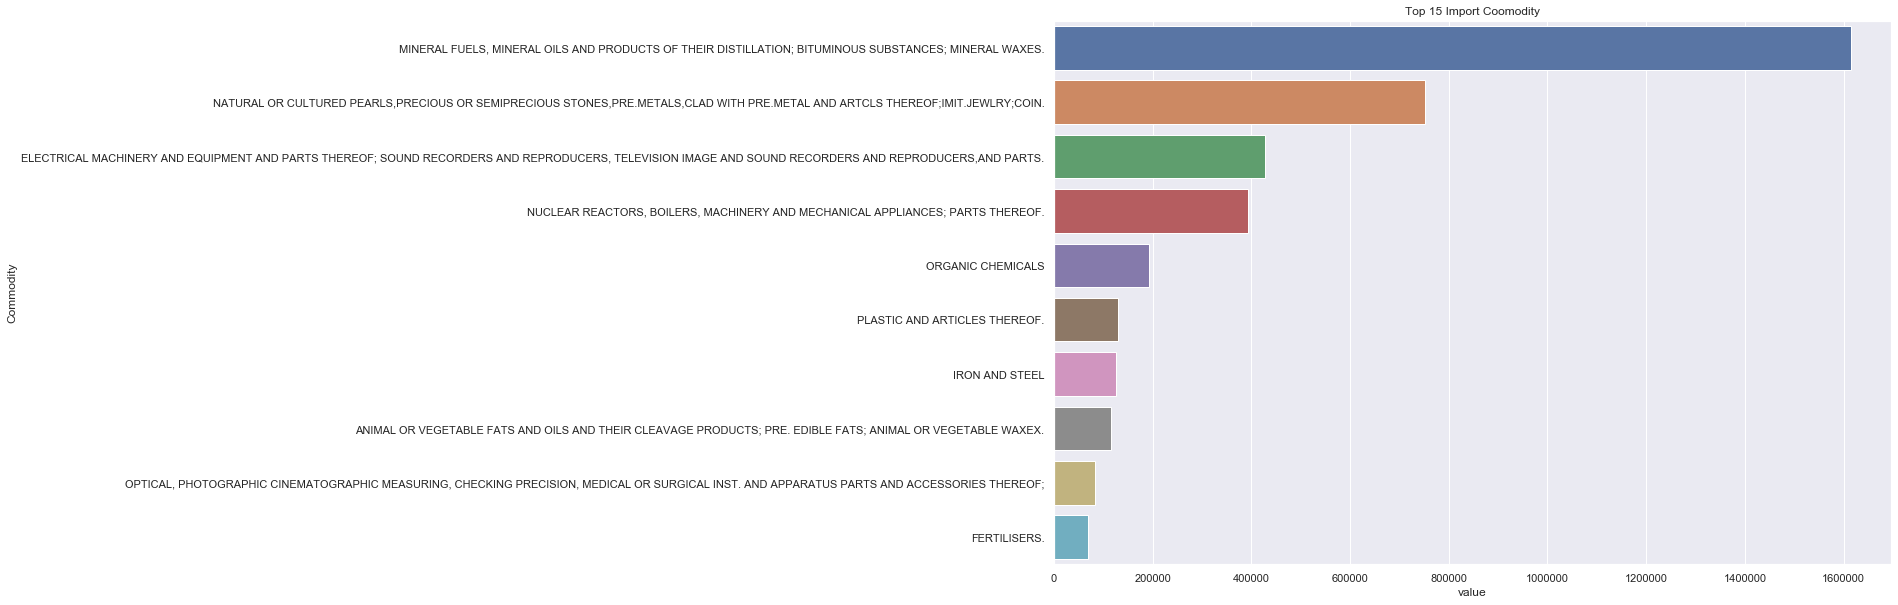

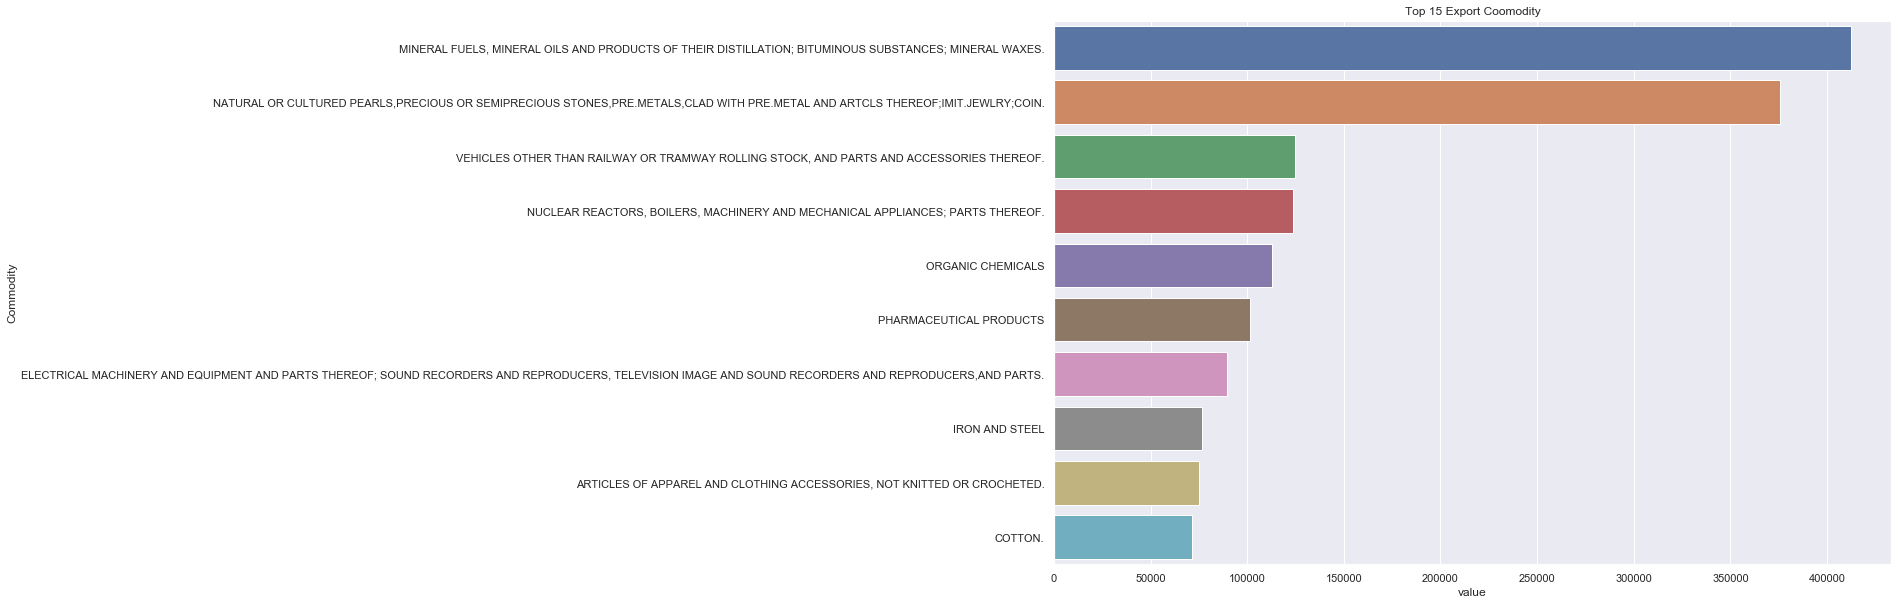

In [37]:
sns.set(rc={'figure.figsize':(15,10)})

sns.barplot(total_import_commodity.value,total_import_commodity.index).set_title("Top 15 Import Coomodity")
plt.show()

sns.barplot(total_export_commodity.value,total_export_commodity.index).set_title("Top 15 Export Coomodity")
plt.show()

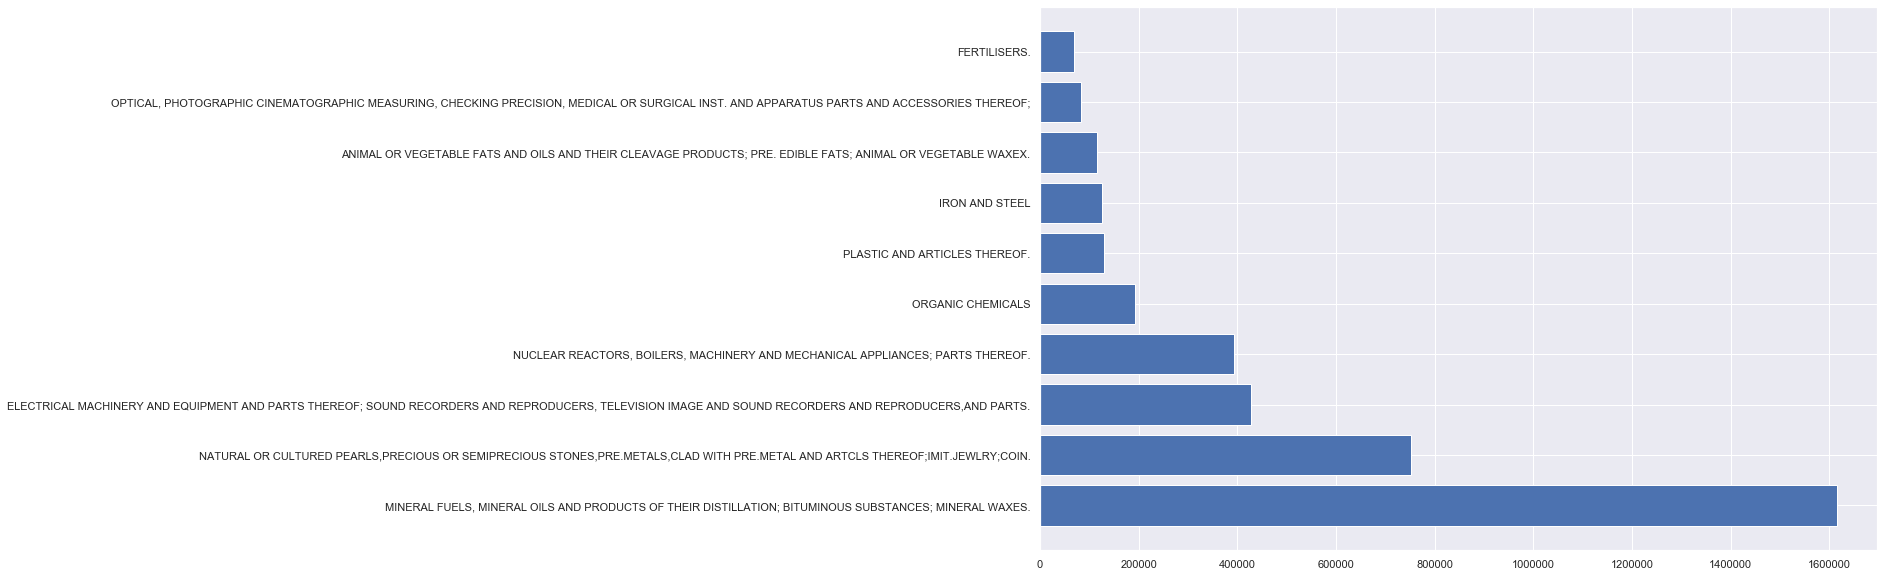

In [59]:
# fig = go.Figure()
# fig.add_trace(go.Bar(
#     x = total_import_commodity.value,
#     y = total_import_commodity.index,
#     orientation='h'
# ))
# fig.show()

fig, ax = plt.subplots()
ax.barh(  total_import_commodity.index,total_import_commodity.value, align='center')
ax.set_title = ("Top 15 Import Coomodity")
plt.show()

In [39]:
total_import_commodity

value
Commodity                                                     
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE...  1615470.69
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC...   751124.09
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...   427091.78
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...   392559.07
ORGANIC CHEMICALS                                    191916.94
PLASTIC AND ARTICLES THEREOF.                        129030.36
IRON AND STEEL                                       125921.20
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE...   115401.17
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING...    83988.96
FERTILISERS.                                          68628.36

In [40]:
total_export_commodity

value
Commodity                                                    
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE...  412501.31
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC...  375706.03
VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING ...  124465.27
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...  123727.12
ORGANIC CHEMICALS                                   112712.70
PHARMACEUTICAL PRODUCTS                             101504.03
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...   89591.47
IRON AND STEEL                                       76473.01
ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, N...   75105.04
COTTON.                                              71253.28

In [41]:
  total_import_country = clean_data_import.groupby('country').agg({'value':'sum'})
total_import_country = total_import_country.sort_values(by = 'value', ascending = False)
total_import_country = total_import_country[:10]

total_export_country = clean_data_export.groupby('country').agg({'value':'sum'})
total_export_country = total_export_country.sort_values(by = 'value', ascending = False)
total_export_country = total_export_country[:10]

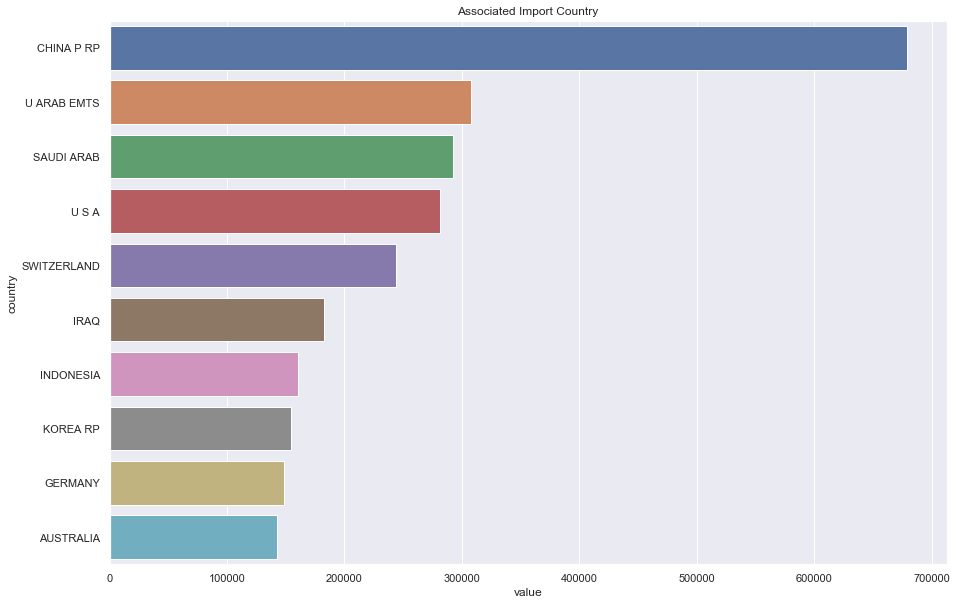

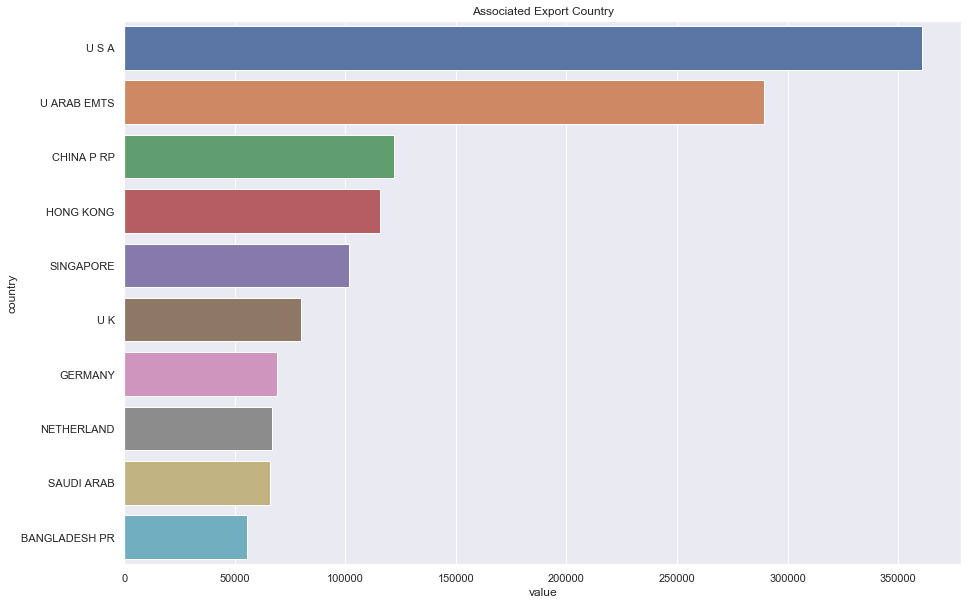

In [42]:
sns.set(rc={'figure.figsize':(15,10)})

sns.barplot(total_import_country.value, total_import_country.index).set_title("Associated Import Country")
plt.show()

sns.barplot(total_export_country.value, total_export_country.index).set_title("Associated Export Country")
plt.show()

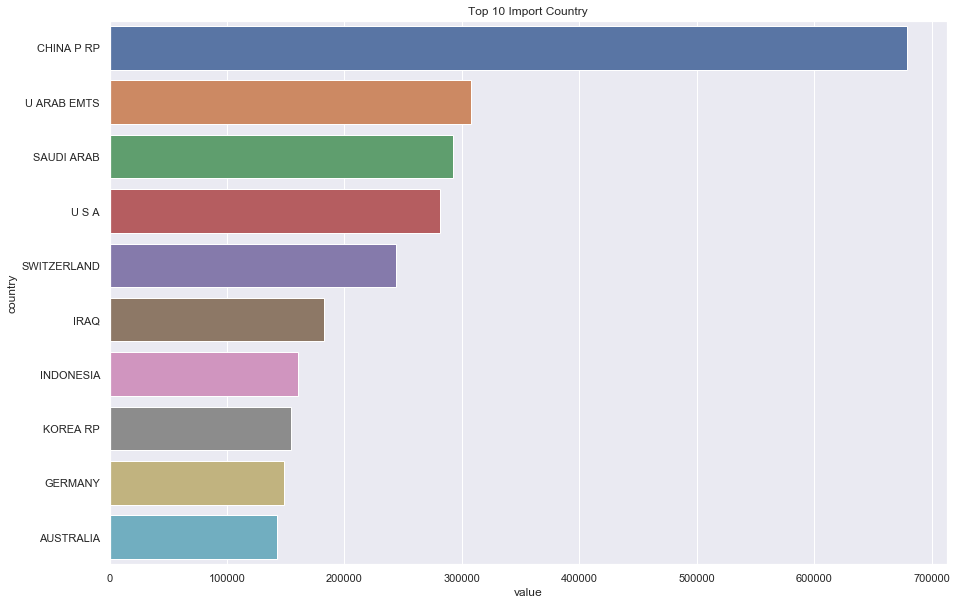

In [77]:
sns.set(rc={'figure.figsize':(15,10)})

sns.barplot(total_import_country.value, total_import_country.index).set_title("Top 10 Import Country")
plt.savefig("Top 10 Import Country")
plt.show()


In [79]:
total_import_country

value
country               
CHINA P RP   678877.15
U ARAB EMTS  307810.15
SAUDI ARAB   292104.09
U S A        281436.58
SWITZERLAND  243739.33
IRAQ         182464.57
INDONESIA    160452.65
KOREA RP     154263.94
GERMANY      148120.79
AUSTRALIA    142723.67

In [82]:
import_2018_china = import_2018[import_2018.country == "CHINA P RP"]
import_2018_china.value.sum()

140638.58000000002

In [83]:
import_2018.value.sum()

1027963.24

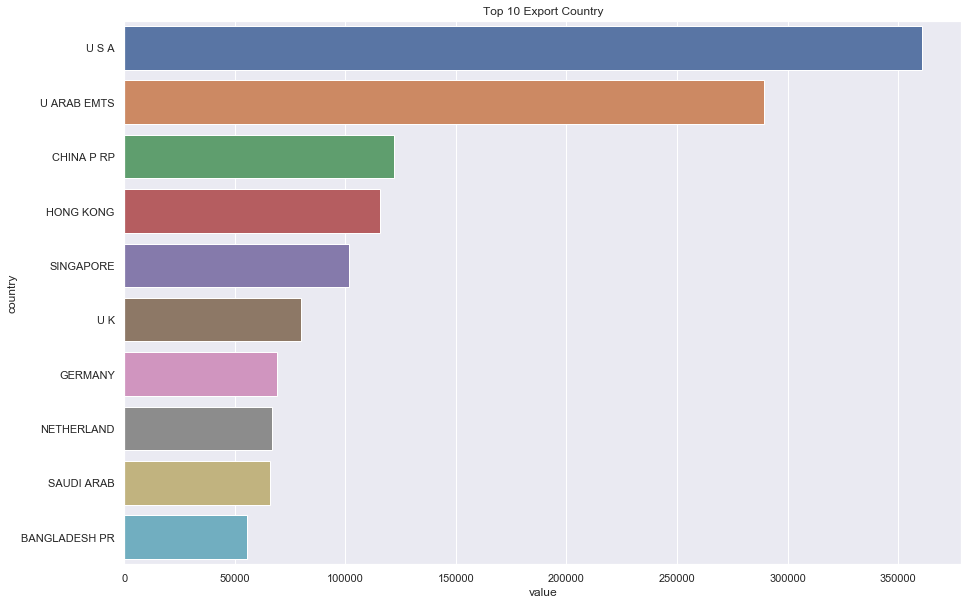

In [78]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(total_export_country.value, total_export_country.index).set_title("Top 10 Export Country")
plt.savefig("Top 10 Export Country")
plt.show()

In [43]:
export_USA = clean_data_export[clean_data_export.country == "U S A"]
export_USA

HSCode                                          Commodity    value  \
14871        1                                      LIVE ANIMALS.     0.18   
14872        2                        MEAT AND EDIBLE MEAT OFFAL.     0.78   
14873        3  FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...  2000.30   
14874        4  DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...    96.08   
14875        5  PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...     2.75   
14876        6  LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...    21.03   
14877        7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.    60.58   
14878        8  EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...    76.13   
14879        9                      COFFEE, TEA, MATE AND SPICES.   314.40   
14880       10                                           CEREALS.   207.17   
14881       11  PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...    60.17   
14882       12  OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...   235.93   
14883       13  LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...   466.59   
14884       14  VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUC...     2.47   
14885       15  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...   116.81   
14886       16  PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...   326.71   
14887       17                    SUGARS AND SUGAR CONFECTIONERY.    21.79   
14888       18                      COCOA AND COCOA PREPARATIONS.    52.03   
14889       19  PREPARATIONS OF CEREALS, FLOUR, STARCH OR MILK...    91.81   
14890       20  PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTH...   109.11   
14891       21                 MISCELLANEOUS EDIBLE PREPARATIONS.   159.29   
14892       22                    BEVERAGES, SPIRITS AND VINEGAR.     8.11   
14893       23  RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; P...   170.31   
14894       24      TOBACCO AND MANUFACTURED TOBACCO SUBSTITUTES.    30.60   
14895       25  SALT; SULPHUR; EARTHS AND STONE; PLASTERING MA...   134.30   
14896       26                                ORES, SLAG AND ASH.     1.92   
14897       27  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...  2435.86   
14898       28  INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...   129.15   
14899       29                                  ORGANIC CHEMICALS  1843.41   
14900       30                            PHARMACEUTICAL PRODUCTS  5389.73   
...        ...                                                ...      ...   
136048      69                                  CERAMIC PRODUCTS.    16.95   
136049      70                               GLASS AND GLASSWARE.    53.81   
136050      71  NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...  5272.78   
136051      72                                     IRON AND STEEL   411.91   
136052      73                          ARTICLES OF IRON OR STEEL  1357.03   
136053      74                       COPPER AND ARTICLES THEREOF.    62.70   
136054      75                       NICKEL AND ARTICLES THEREOF.     5.56   
136055      76                    ALUMINIUM AND ARTICLES THEREOF.    72.58   
136056      78                         LEAD AND ARTICLES THEREOF.     0.62   
136057      79                         ZINC AND ARTICLES THEREOF.     2.59   
136058      80                          TIN AND ARTICLES THEREOF.     0.22   
136059      81      OTHER BASE METALS; CERMETS; ARTICLES THEREOF.    10.49   
136060      82  TOOLS IMPLEMENTS, CUTLERY, SPOONS AND FORKS, O...   117.32   
136061      83              MISCELLANEOUS ARTICLES OF BASE METAL.    50.17   
136062      84  NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...  1140.68   
136063      85  ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...  1296.65   
136064      86  RAILWAY OR TRAMWAY LOCOMOTIVES, ROLLING-STOCK ...     7.18   
136065      87  VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...   773.87   
136066      88           AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.   539.97   
136067      89              SH

In [44]:
export_USA_commodity = export_USA.groupby("Commodity").agg({'value':'sum'})
export_USA_commodity = export_USA_commodity.sort_values(by = 'value', ascending = False)

In [98]:
export_USA_commodity = export_USA_commodity[:10]
export_USA_commodity

value
Commodity                                                   
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC...  74002.62
PHARMACEUTICAL PRODUCTS                             34856.28
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE...  20822.49
OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOT...  18991.17
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...  18885.94
ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, N...  17670.66
ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, K...  14248.89
ORGANIC CHEMICALS                                   13736.78
ARTICLES OF IRON OR STEEL                           13589.60
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...  12807.25

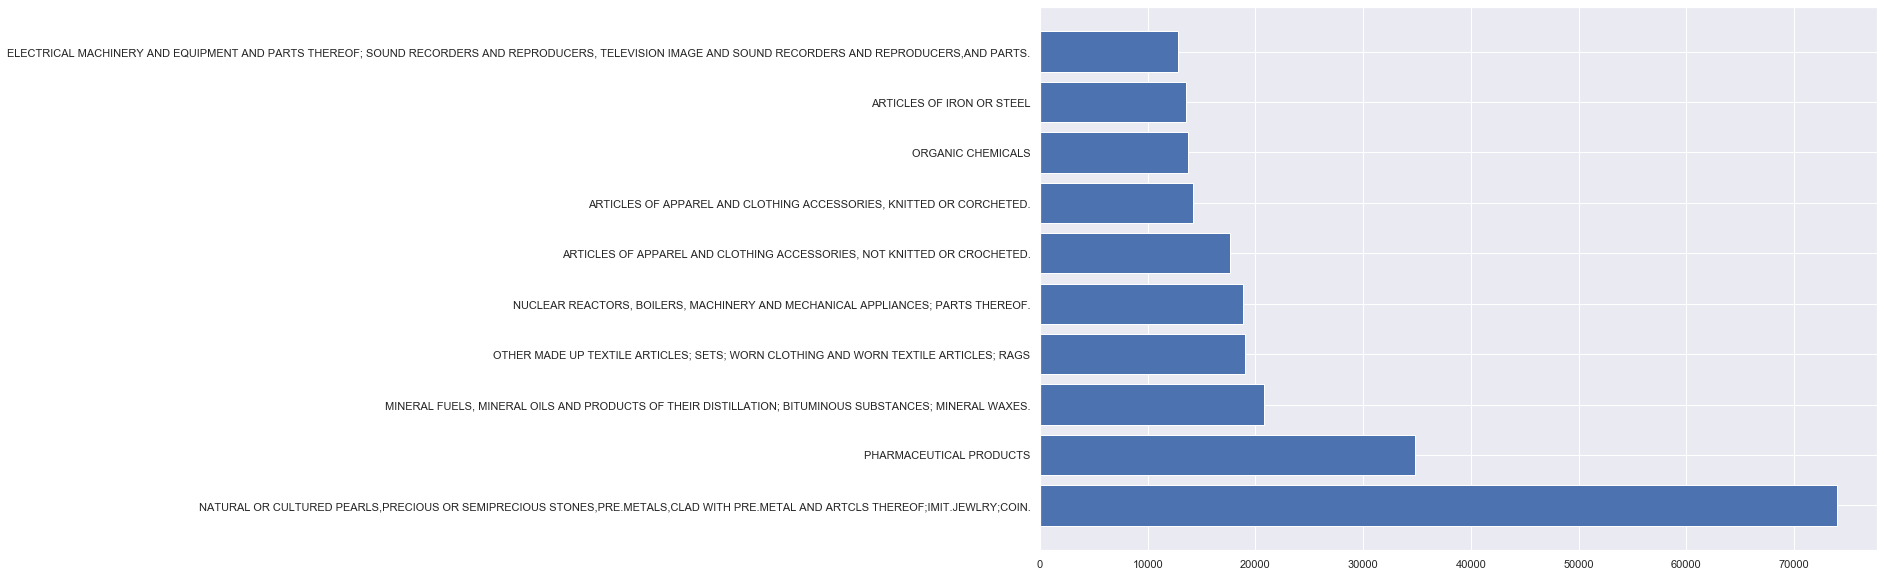

In [99]:
fig, ax = plt.subplots()
ax.barh(export_USA_commodity.index, export_USA_commodity.value, align='center')
ax.set_title = ("Top 10 Commodity Exported to USA")
plt.savefig("Top 10 Commodity Exported to USA")
plt.show()

In [86]:
import_China = clean_data_import[clean_data_import.country == "CHINA P RP"]
import_China.head(10)

HSCode                                          Commodity  value  \
1390       3  FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...   0.94   
1392       5  PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...   2.47   
1393       6  LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...   3.77   
1394       7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.  50.11   
1395       8  EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...   6.53   
1396       9                      COFFEE, TEA, MATE AND SPICES.  10.33   
1397      10                                           CEREALS.   0.20   
1398      11  PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...  18.21   
1399      12  OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...  11.77   
1400      13  LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...  16.87   

         country  year  
1390  CHINA P RP  2018  
1392  CHINA P RP  2018  
1393  CHINA P RP  2018  
1394  CHINA P RP  2018  
1395  CHINA P RP  2018  
1396  CHINA P RP  2018  
1397  CHINA P RP  2018  
1398  CHINA P RP  2018  
1399  CHINA P RP  2018  
1400  CHINA P RP  2018

In [87]:
import_China_commodity =import_China.groupby('Commodity').agg({'value':'sum'})
import_China_commodity = import_China_commodity.sort_values(by = 'value', ascending = False)
import_China_commodity =import_China_commodity[:10]

In [89]:
fig, ax = plt.subplots()
ax.barh(import_China_commodity.index, import_China_commodity.value)
ax.set_title("Top 10 Imported Goods from China")
plt.show()

# fig, ax = plt.subplots()
# ax.barh(export_USA_commodity.index, export_USA_commodity.value, align='center')
# ax.set_title = ("Top 10 Commodity Exported Goods to USA")
# plt.show()

In [90]:
import_China_commodity.head(10)

value
Commodity                                                    
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...  211333.10
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...  122972.80
ORGANIC CHEMICALS                                    67968.59
FERTILISERS.                                         22962.95
PLASTIC AND ARTICLES THEREOF.                        19794.27
PROJECT GOODS; SOME SPECIAL USES.                    19633.11
IRON AND STEEL                                       18819.52
ARTICLES OF IRON OR STEEL                            15648.11
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING...   13975.33
VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING ...   13034.66

In [91]:
import_China_commodity.value.sum()

526142.4400000001

In [95]:
import_china_2018_commodity = import_2018_china.groupby("Commodity").agg({"value":"sum"})
import_china_2018_commodity = import_china_2018_commodity.sort_values(by = "value", ascending = False)
import_china_2018_commodity[:10]

value
Commodity                                                   
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...  41255.12
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...  26767.52
ORGANIC CHEMICALS                                   17192.50
PLASTIC AND ARTICLES THEREOF.                        5445.20
FERTILISERS.                                         4106.44
ARTICLES OF IRON OR STEEL                            3470.66
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING...   3175.38
VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING ...   3042.20
IRON AND STEEL                                       2844.74
MISCELLANEOUS CHEMICAL PRODUCTS.                     2581.18

In [97]:
import_2018.value.sum()

1027963.24

In [61]:
import_2015 = clean_data_import[clean_data_import.year == 2015]
import_2016 = clean_data_import[clean_data_import.year == 2016]
import_2017 = clean_data_import[clean_data_import.year == 2017]
import_2018 = clean_data_import[clean_data_import.year == 2018]

In [67]:
import_2015_commodity = import_2015.groupby("Commodity").agg({'value':'sum'})
import_2015_commodity = import_2015_commodity.sort_values(by = 'value', ascending = False)
import_2015_commodity = import_2015_commodity[:10]

fig, ax = plt.subplots()
ax.barh(import_2015_commodity.index, import_2015_commodity.value, align='center')
ax.set_title = ("Top 10 Commodity Imported in 2015")
plt.show()

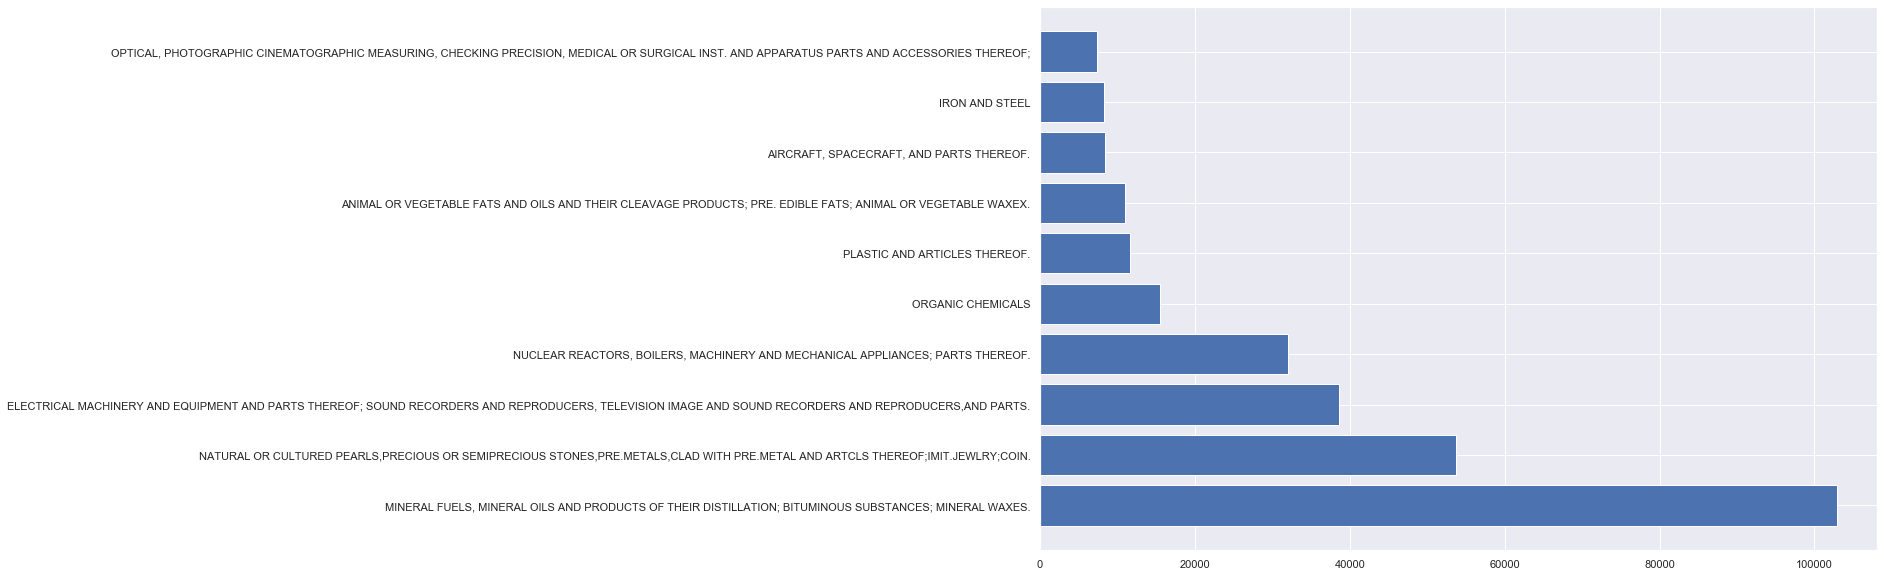

In [73]:
import_2016_commodity = import_2016.groupby("Commodity").agg({'value':'sum'})
import_2016_commodity = import_2016_commodity.sort_values(by = 'value', ascending = False)
import_2016_commodity = import_2016_commodity[:10]

fig, ax = plt.subplots()
ax.barh(import_2016_commodity.index, import_2016_commodity.value, align='center')
ax.set_title = ("Top 10 Commodity Imported in 2016")
plt.savefig('Top 10 Commodity Imported in 2016.pdf')
plt.show()

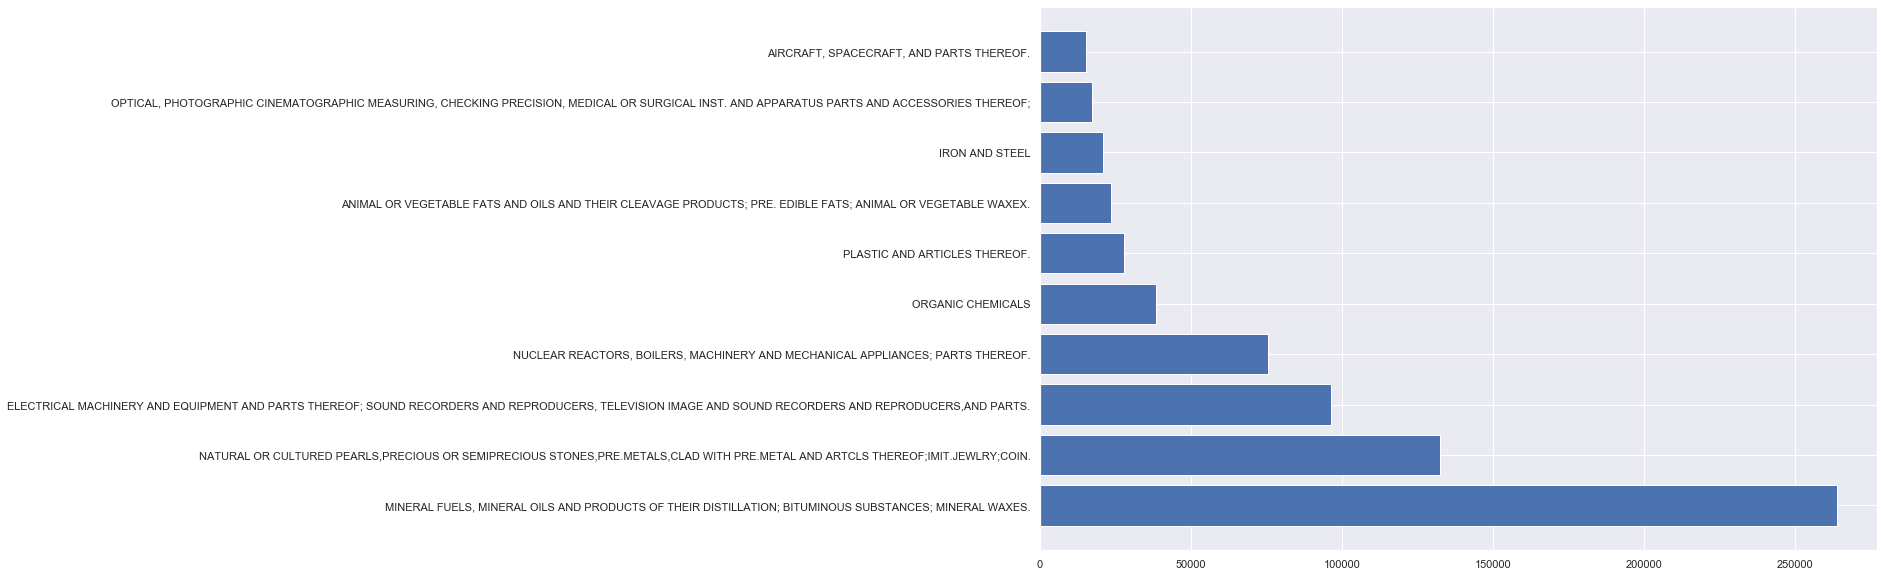

In [72]:
import_2017_commodity = import_2017.groupby("Commodity").agg({'value':'sum'})
import_2017_commodity = import_2017_commodity.sort_values(by = 'value', ascending = False)
import_2017_commodity = import_2017_commodity[:10]

fig, ax = plt.subplots()
ax.barh(import_2017_commodity.index, import_2017_commodity.value, align='center')
ax.set_title = ("Top 10 Commodity Imported in 2017")
plt.savefig('Top 10 Commodity Imported in 2017.pdf')
plt.show()


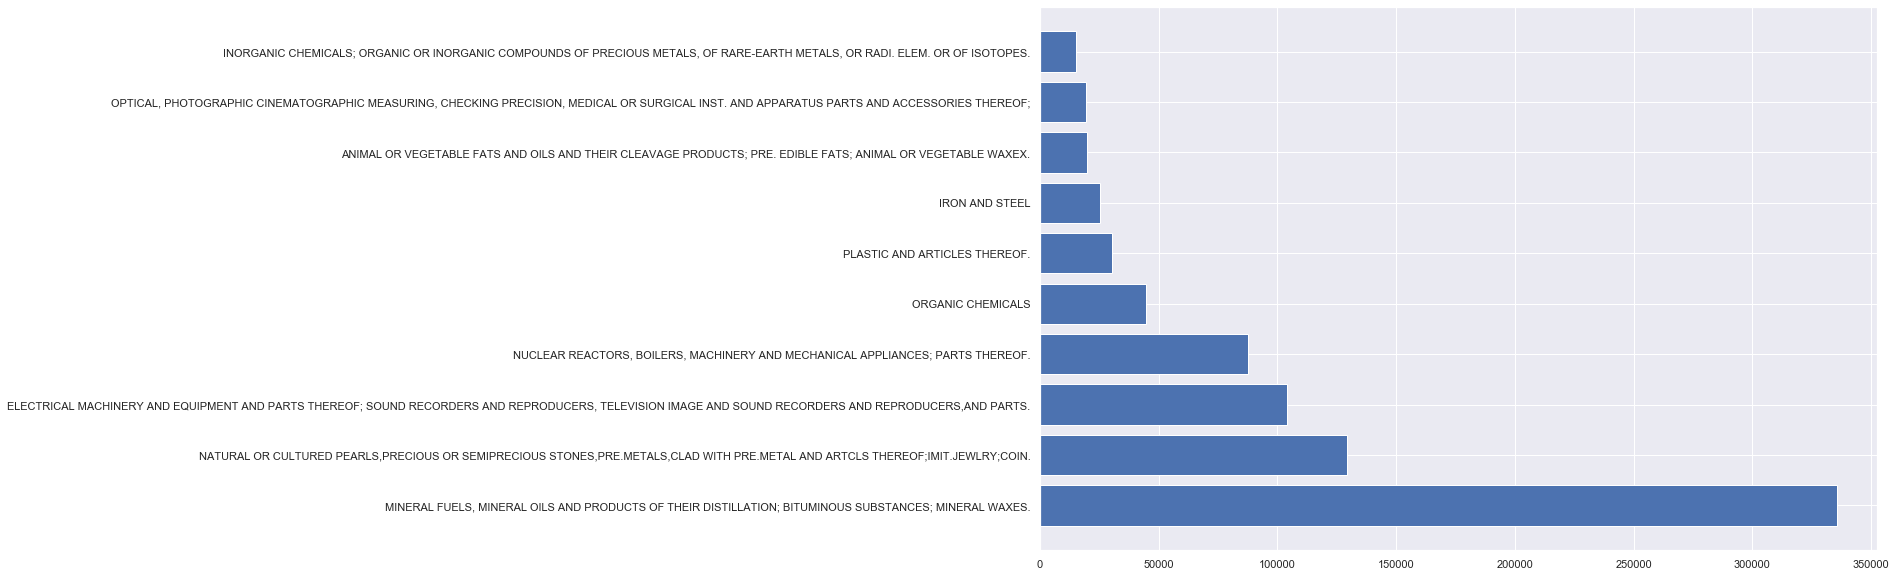

In [70]:
import_2018_commodity = import_2018.groupby("Commodity").agg({'value':'sum'})
import_2018_commodity = import_2018_commodity.sort_values(by = 'value', ascending = False)
import_2018_commodity = import_2018_commodity[:10]

fig, ax = plt.subplots()
ax.barh(import_2018_commodity.index, import_2018_commodity.value, align='center')
ax.set_title = ("Top 10 Commodity Imported in 2018")
plt.show()


In [74]:

import_2018_commodity

value
Commodity                                                    
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE...  335721.44
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC...  129425.78
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...  104091.92
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...   87670.12
ORGANIC CHEMICALS                                    44765.28
PLASTIC AND ARTICLES THEREOF.                        30492.28
IRON AND STEEL                                       25161.68
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE...   19988.82
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING...   19260.18
INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPO...   15248.76